# Parametric maps
This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [8]:
import pyclesperanto as cle

from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

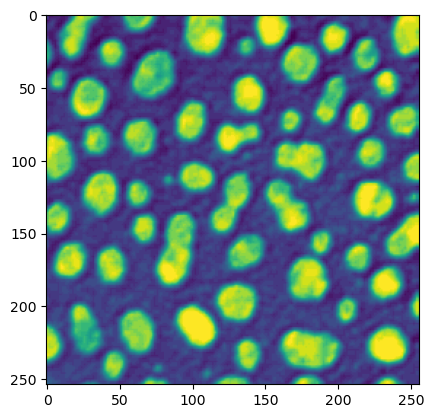

In [9]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')[0]
blobs = cle.push(image)

plt.imshow(blobs)

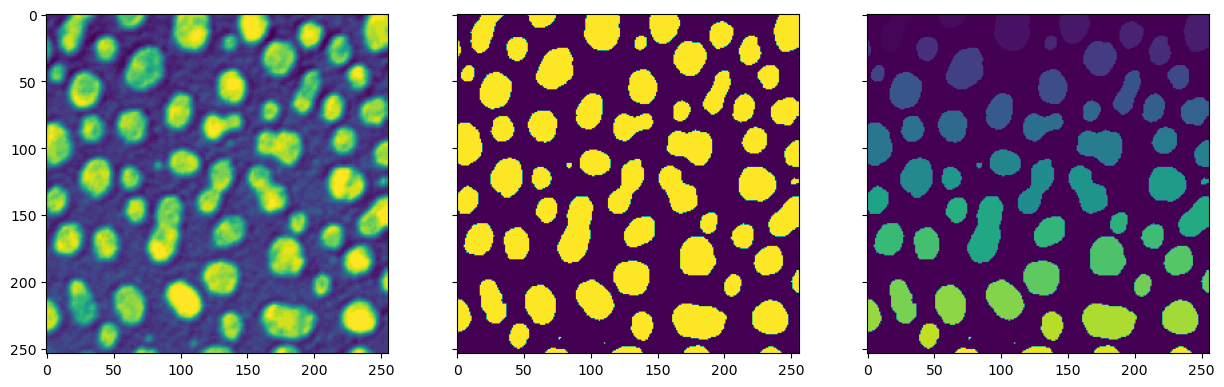

In [10]:
binary = cle.threshold_otsu(blobs)
labels = cle.connected_components_labeling(binary)

fig, axs = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
axs[0].imshow(image)
axs[1].imshow(binary)
axs[2].imshow(labels)
plt.show()

# Quantitative maps a.k.a. parametric images
## Pixel count map

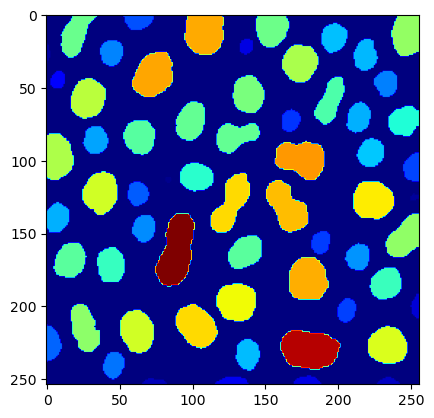

In [ ]:
pixel_count_map = cle.label_pixel_count_map(labels)

plt.imshow(pixel_count_map, cmap='jet')

## Extension ratio map
The extension ratio is a shape descriptor derived from the maximum distance of pixels to their object's centroid divided by the average distance of pixels to the centroid.

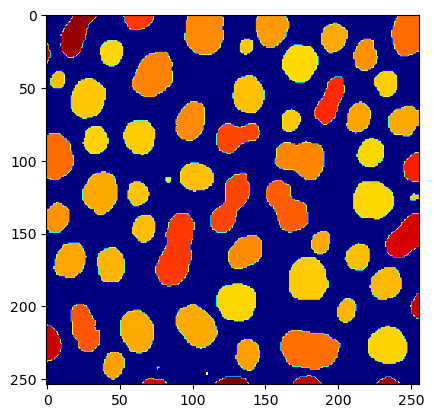

In [12]:
extension_ratio_map = cle.extension_ratio_map(labels)

plt.imshow(extension_ratio_map, cmap='jet')

## Mean / minimum / maximum / standard-deviation intensity map

In [ ]:
mean_intensity_map = cle.label_mean_intensity_map(blobs, labels)
minimum_intensity_map = cle.minimum_intensity_map(blobs, labels)
maximum_intensity_map = cle.maximum_intensity_map(blobs, labels)
stddev_intensity_map = cle.standard_deviation_intensity_map(blobs, labels)

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axs[0].imshow(mean_intensity_map, cmap='jet')
axs[0].set_title('Mean intensity map')
axs[1].imshow(minimum_intensity_map, cmap='jet')
axs[1].set_title('Minimum intensity map')
axs[2].imshow(maximum_intensity_map, cmap='jet')
axs[2].set_title('Maximum intensity map')
axs[3].imshow(stddev_intensity_map, cmap='jet')
axs[3].set_title('Standard deviation intensity map')
plt.show()

AttributeError: module 'pyclesperanto' has no attribute 'label_mean_intensity_map'

## Neigbor count and distance maps

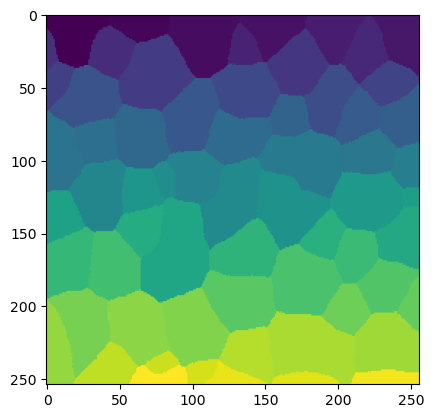

In [ ]:
enlarged_labels = cle.extend_labeling_via_voronoi(labels)
touching_neighbor_count_map = cle.touching_neighbor_count_map(enlarged_labels)
proximal_neighbor_count_map = cle.proximal_neighbor_count_map(labels, max_distance=50)
n_nearest_neighbor_distance_map = cle.average_distance_of_n_closest_neighbors_map(labels, n=3)


fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axs[0].imshow(enlarged_labels, cmap='jet')
axs[0].set_title('Extended labels')
axs[1].imshow(touching_neighbor_count_map, cmap='jet')
axd[1].set_title('Touching neighbor count map')
axs[2].imshow(proximal_neighbor_count_map, cmap='jet')
axs[2].set_title('Proximal neighbor count map')
axs[3].imshow(n_nearest_neighbor_distance_map, cmap='jet')
axs[3].set_title('N nearest neighbor distance map')
plt.show()